In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from keras.datasets import cifar10

Using TensorFlow backend.


In [3]:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

In [4]:
x_train.shape

(50000, 32, 32, 3)

In [5]:
y_train.shape

(50000, 1)

# Class label 

0) Airplanes
1) Cars
2) Birds
3) Cats
4) Deer
5) Dogs
6) Frogs
7) Horses
8) Ships
9) Trucks

[0]


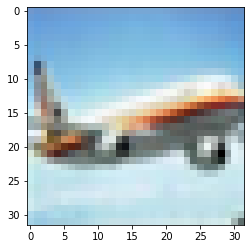

In [6]:
i = 2512
plt.imshow(x_train[i])
print(y_train[i])

C:\Users\rajes\Anaconda3\lib\site-packages\matplotlib\text.py:1150: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if s != self._text:


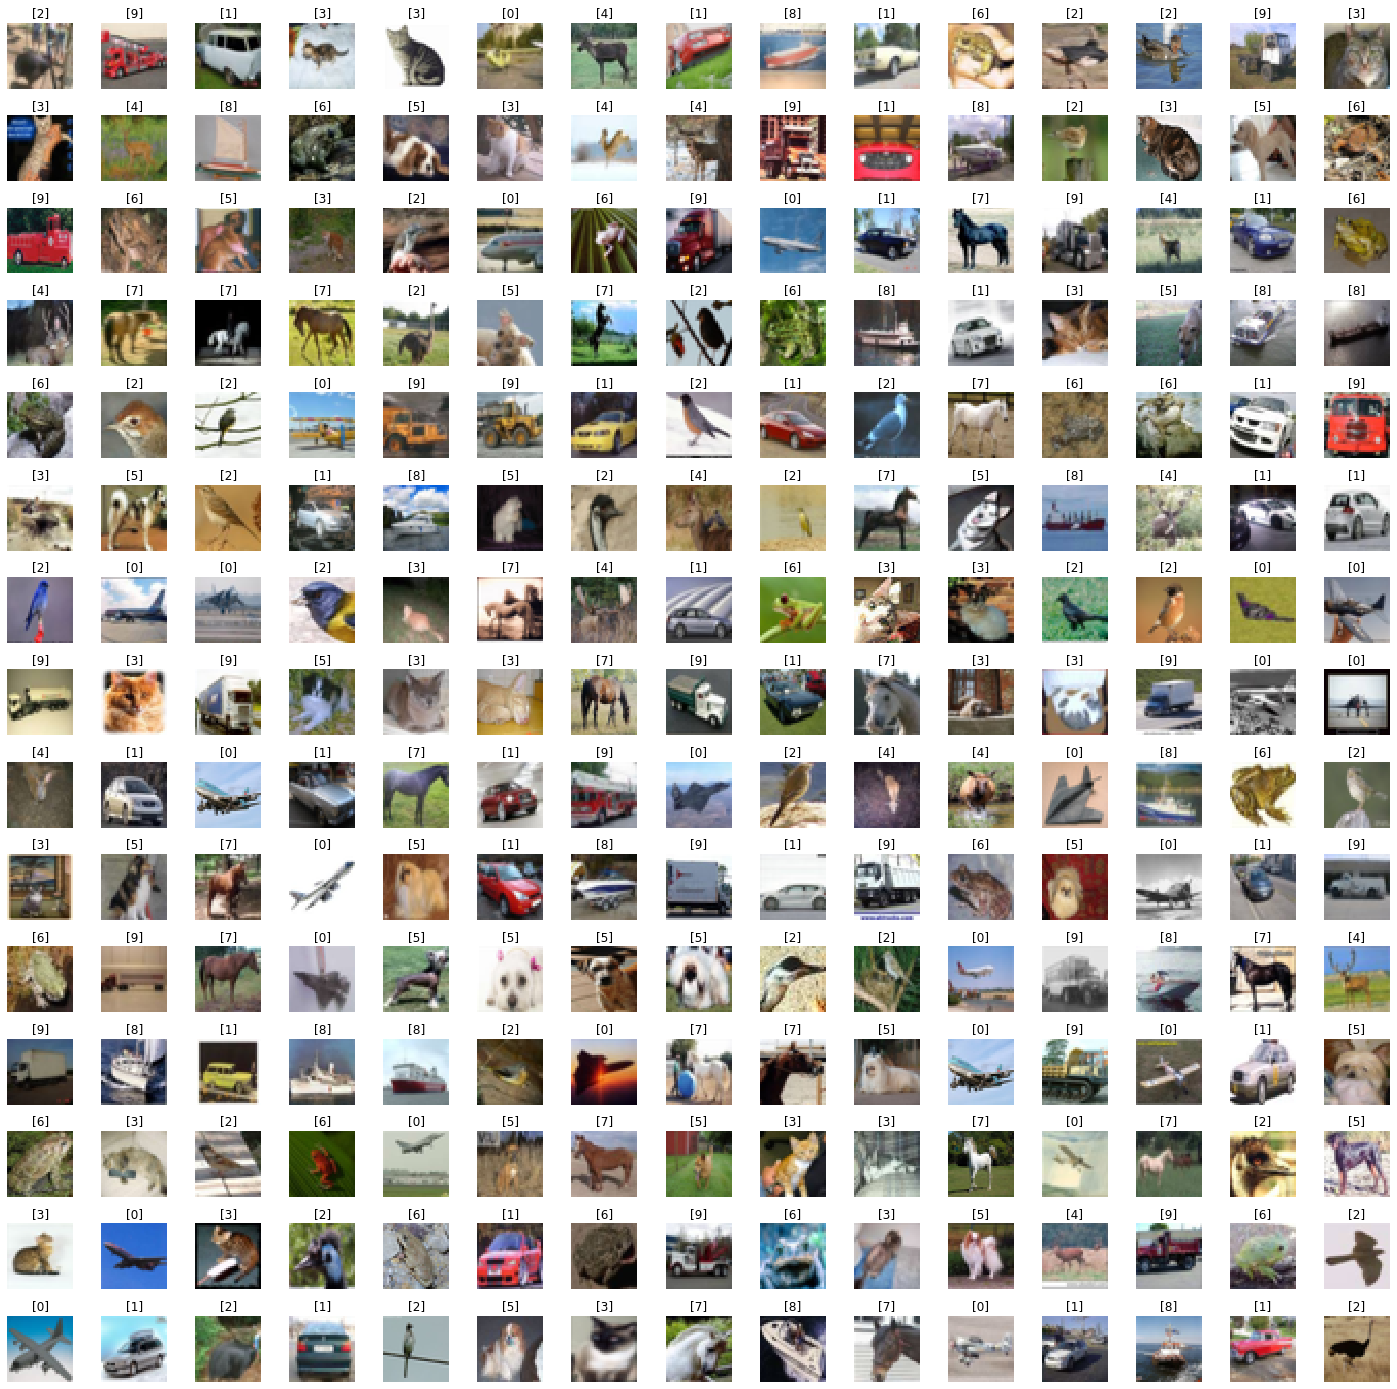

In [7]:
w = 15
l = 15
fig, axes = plt.subplots(l, w, figsize = (25, 25))
axes = axes.ravel()
n_training = len(x_train)

for i in np.arange(0, l * w):
    index = np.random.randint(0, n_training)
    axes[i].imshow(x_train[index])
    axes[i].set_title(y_train[index])
    axes[i].axis('off')
plt.subplots_adjust(hspace = 0.4)

# Data Preparation

In [8]:
x_train = x_train.astype('float32')
x_train[1]

array([[[154., 177., 187.],
        [126., 137., 136.],
        [105., 104.,  95.],
        ...,
        [ 91.,  95.,  71.],
        [ 87.,  90.,  71.],
        [ 79.,  81.,  70.]],

       [[140., 160., 169.],
        [145., 153., 154.],
        [125., 125., 118.],
        ...,
        [ 96.,  99.,  78.],
        [ 77.,  80.,  62.],
        [ 71.,  73.,  61.]],

       [[140., 155., 164.],
        [139., 146., 149.],
        [115., 115., 112.],
        ...,
        [ 79.,  82.,  64.],
        [ 68.,  70.,  55.],
        [ 67.,  69.,  55.]],

       ...,

       [[175., 167., 166.],
        [156., 154., 160.],
        [154., 160., 170.],
        ...,
        [ 42.,  34.,  36.],
        [ 61.,  53.,  57.],
        [ 93.,  83.,  91.]],

       [[165., 154., 128.],
        [156., 152., 130.],
        [159., 161., 142.],
        ...,
        [103.,  93.,  96.],
        [123., 114., 120.],
        [131., 121., 131.]],

       [[163., 148., 120.],
        [158., 148., 122.],
        [163., 1

In [9]:
number_cat = 10
y_train

array([[6],
       [9],
       [9],
       ...,
       [9],
       [1],
       [1]], dtype=uint8)

In [10]:
import keras
y_train = keras.utils.to_categorical(y_train, number_cat)
y_train

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.],
       ...,
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.]], dtype=float32)

In [11]:
y_test = keras.utils.to_categorical(y_test, number_cat)

x_train = x_train/255
x_test = x_test/255
x_test

In [12]:
x_train.shape

(50000, 32, 32, 3)

In [13]:
Input_shape = x_train.shape[1:]
Input_shape

(32, 32, 3)

# Train model

In [14]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, AveragePooling2D, Dense, Flatten, Dropout
from keras.optimizers import Adam
from keras.callbacks import TensorBoard

In [15]:
cnn_model = Sequential()
cnn_model.add(Conv2D(filters = 32, kernel_size = (3, 3), activation = 'relu', input_shape = Input_shape))
cnn_model.add(Conv2D(filters = 32, kernel_size = (3, 3), activation = 'relu'))
cnn_model.add(Conv2D(filters = 32, kernel_size = (3, 3), activation = 'relu'))
cnn_model.add(MaxPooling2D(2, 2))
cnn_model.add(Dropout(0.3))

cnn_model.add(Conv2D(filters = 64, kernel_size = (3, 3), activation = 'relu'))
cnn_model.add(Conv2D(filters = 64, kernel_size = (3, 3), activation = 'relu'))
cnn_model.add(Conv2D(filters = 64, kernel_size = (3, 3), activation = 'relu'))
cnn_model.add(MaxPooling2D(2, 2))
cnn_model.add(Dropout(0.2))

cnn_model.add(Flatten())
cnn_model.add(Dense(units = 512, activation = 'relu'))
cnn_model.add(Dense(units = 512, activation = 'relu'))
cnn_model.add(Dense(units = 10, activation = 'softmax'))


In [16]:
cnn_model.compile(loss = 'categorical_crossentropy', optimizer = keras.optimizers.rmsprop(lr = 0.001), metrics = ['accuracy'])

In [17]:
history = cnn_model.fit(x_train, y_train, batch_size = 32, epochs = 2, shuffle = True)

Epoch 1/2
50000/50000 [==============================] - 182s 4ms/step - loss: 1.8423 - accuracy: 0.3385
Epoch 2/2
50000/50000 [==============================] - 190s 4ms/step - loss: 1.4780 - accuracy: 0.4778


# Evaluate Model

In [18]:
eva = cnn_model.evaluate(x_test, y_test)
print ('Accuracy -> {}'.format(eva[1]))

10000/10000 [==============================] - 15s 1ms/step
Accuracy -> 0.43160000443458557


In [19]:
predicted_class = cnn_model.predict_classes(x_test)
predicted_class

array([6, 8, 8, ..., 5, 4, 7], dtype=int64)

In [20]:
y_test

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 1., 0., 0.]], dtype=float32)

In [21]:
y_test = y_test.argmax(1)
y_test

array([3, 8, 8, ..., 5, 1, 7], dtype=int64)

In [22]:
x_test = x_test.astype(np.uint8)

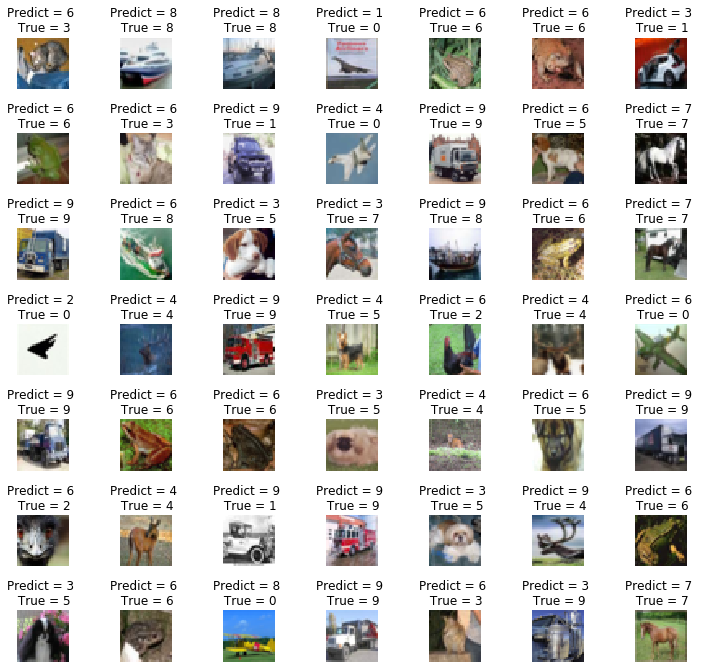

In [23]:
w = 7
l = 7
fig, axes = plt.subplots(w, l, figsize = (12, 12))
axes = axes.ravel()

for i in np.arange(0, w*l):
    axes[i].imshow(x_test[i])
    axes[i].set_title('Predict = {} \n True = {}'.format(predicted_class[i], y_test[i]))
    axes[i].axis('off')
plt.subplots_adjust(wspace = 1)

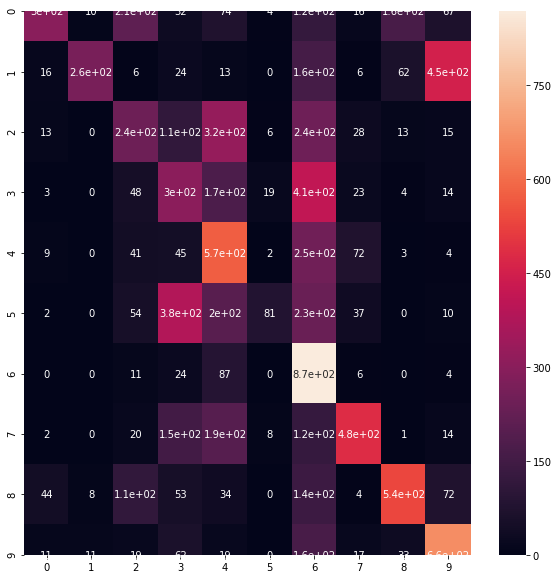

In [24]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

cm = confusion_matrix(y_test, predicted_class)
plt.figure(figsize = (10, 10))
sns.heatmap(cm, annot = True)

# Save the Model

In [25]:
import os
directory = os.path.join(os.getcwd(), 'saved_model')

if not os.path.isdir(directory):
    os.makedirs(directory)
model_path = os.path.join(directory, 'keras_cifar10_trained_model.h5')
cnn_model.save(model_path)

# Data augmentation

In [ ]:
import keras
from keras.datasets import cifar10
(x_train, y_train), (x_test, y_test) = cifar10.load_data()
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')